# Task 1 
load the data, separate the labels from the rest, produce a pairplot of X and comment it

In [8]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("exam_data.csv")
df.shape

(1000, 4)

In [4]:
df.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


In [6]:
df.describe(include="all")

,A0,A1,A2,y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1489.096297,-7.166652,0.505010,0.999000
std,274.553828,13.077564,0.293416,0.817109
min,690.679955,-22.833984,0.000412,0.000000
25%,1295.382256,-17.161708,0.246973,0.000000
50%,1495.200642,-14.249017,0.518429,1.000000
75%,1676.991938,9.600518,0.766703,2.000000
max,2185.753771,17.595486,0.999833,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      1000 non-null   float64
 1   A1      1000 non-null   float64
 2   A2      1000 non-null   float64
 3   y       1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [10]:
target = df.columns[-1]
print(target)
X = df.drop(target, axis=1)
y = df[target]

X.shape, y.shape

y


((1000, 3), (1000,))

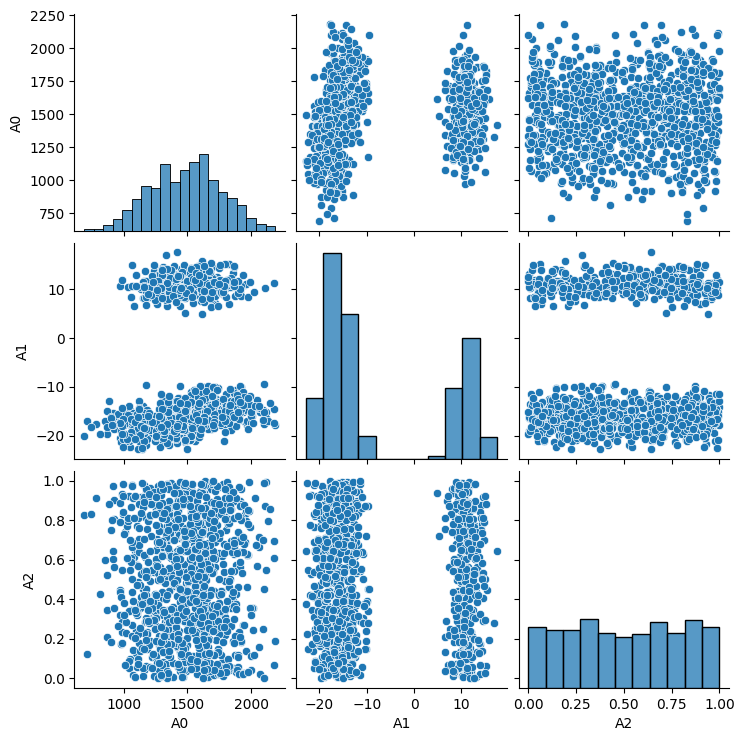

In [11]:
sns.pairplot(X)

Innanzitutto notiamo che le feature hanno range molto diversi, ad esempio: A0 varia da 1000 a 2000 mentre A2 varia da 0 a 1

osserivamo poi che A1 ha una distribuzione bimodale, questo è sicuramente interessante ai fini di clustering dato che in base a quale delle due curve un punto appartiene A2 è già sufficiente per distinguere quest'ultimo in cluster diversi.

Infine abbiamo che A0 ha una distribuzione simmetrica mentre A2 ha una distribuzione uniforme

# Task 2

fai e ottimizza un clustering con un metodo che ti pare.

plot the silhouette score and show the chosen hyperparameters

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = pd.DataFrame(columns=["labels", "n_clusters", "silhouette", "inertia"])

params_list = list(range(2,11))
params_list

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
for p in params_list:
    km = KMeans(n_clusters=p)
    labels = km.fit_predict(X)

    sil = silhouette_score(X, labels)
    results.loc[len(results)] = [labels, p, sil, km.inertia_]


In [20]:
results.sort_values(by=["silhouette", "inertia"], ascending=[False, True])

,labels,n_clusters,silhouette,inertia
0,"[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...",2,0.567160,2.520345e+07
2,"[0, 1, 3, 1, 2, 2, 0, 1, 3, 1, 3, 3, 0, 0, 2, ...",4,0.540522,7.425540e+06
1,"[1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, ...",3,0.524244,1.312280e+07
5,"[5, 3, 0, 2, 2, 2, 5, 3, 0, 2, 0, 6, 5, 4, 1, ...",7,0.517269,2.878447e+06
6,"[6, 7, 5, 1, 4, 4, 3, 7, 5, 1, 5, 2, 6, 0, 4, ...",8,0.510453,2.245638e+06
3,"[4, 3, 1, 3, 0, 0, 4, 3, 1, 3, 1, 1, 4, 2, 0, ...",5,0.507593,5.479983e+06
7,"[2, 5, 8, 0, 1, 1, 4, 5, 8, 0, 3, 3, 2, 6, 1, ...",9,0.504342,1.893188e+06
4,"[0, 1, 2, 1, 5, 5, 0, 2, 2, 1, 2, 4, 0, 3, 5, ...",6,0.488221,4.026367e+06
8,"[4, 5, 7, 6, 2, 2, 0, 1, 7, 6, 7, 3, 4, 9, 2, ...",10,0.486204,1.658036e+06


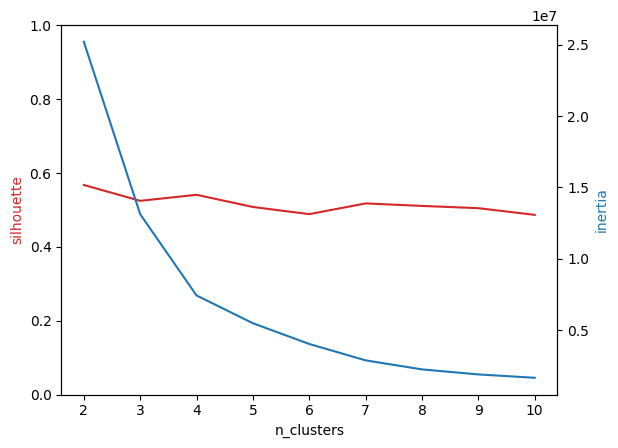

In [32]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
plt.xlabel("n_clusters")

color="tab:red"
ax1.set_ylim(0, 1)
ax1.set_ylabel("silhouette", color=color)
ax1.plot(results["n_clusters"], results["silhouette"], color=color)

ax2 = ax1.twinx()

color="tab:blue"
ax2.set_ylabel("inertia", color=color)
ax2.plot(results["n_clusters"], results["inertia"], color=color)

4 sembra essere il numero di cluster giusto

In [62]:
best_labels = results.loc[results["n_clusters"] == 4, "labels"].values[0]
best_labels

array([0, 1, 3, 1, 2, 2, 0, 1, 3, 1, 3, 3, 0, 0, 2, 1, 1, 1, 3, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 2, 3, 1, 0, 2, 2, 2,
       0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 3, 0, 3, 0, 1, 2, 2, 3, 2, 1, 1, 1,
       2, 3, 3, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 1, 0, 1,
       1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 3,
       0, 3, 3, 3, 3, 2, 2, 0, 2, 0, 3, 3, 2, 2, 1, 3, 1, 1, 2, 2, 3, 0,
       2, 2, 2, 3, 0, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 0, 3, 3, 1, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 2, 3, 2, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 0, 3,
       0, 0, 1, 3, 2, 2, 0, 2, 2, 1, 3, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 3, 1, 3, 3, 0, 2, 2, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 1,
       0, 1, 3, 1, 1, 0, 2, 3, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 3,
       0, 1, 0, 2, 1, 3, 2, 3, 1, 2, 1, 0, 2, 2, 3, 3, 1, 2, 2, 2, 0, 1,
       3, 2, 3, 1, 2, 3, 0, 3, 1, 1, 0, 3, 3, 2, 1, 1, 1, 2, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 3,

(array([0, 1, 2, 3], dtype=int32), array([175, 306, 335, 184]))

([<matplotlib.patches.Wedge at 0x7360aa343750>,
 [Text(0.9379041891252708, 0.5747484075848044, '0'),
  Text(-0.5177744921078029, 0.9705202601298475, '1'),
  Text(-0.6549223584117317, -0.8837854402808497, '2'),
  Text(0.9212809795896502, -0.6010335736432157, '3')],
 [Text(0.5115841031592385, 0.3134991314098933, '17.50%'),
  Text(-0.28242245024061974, 0.5293746873435531, '30.60%'),
  Text(-0.35723037731549, -0.48206478560773613, '33.50%'),
  Text(0.5025168979579909, -0.3278364947144813, '18.40%')])

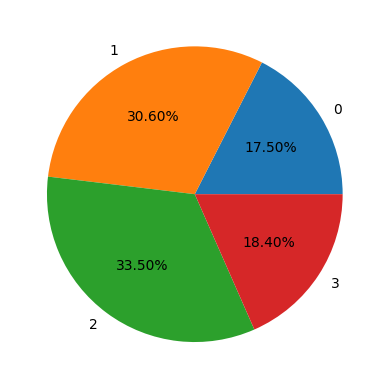

In [70]:
import numpy as np

km_label_counts = np.unique(best_labels, return_counts=True)
display(km_label_counts)

plt.pie(km_label_counts[1], labels=km_label_counts[0], autopct="%.02f%%")

(array([0, 1, 2]), array([334, 333, 333]))

([<matplotlib.patches.Wedge at 0x7360aa3eb750>,
 [Text(0.548003594845834, 0.9537777833625835, '0'),
  Text(-1.0999945720746371, -0.003455633999197001, '1'),
  Text(0.5509975934780721, -0.9520512864238845, '2')],
 [Text(0.29891105173409127, 0.5202424272886819, '33.40%'),
  Text(-0.5999970393134383, -0.001884891272289273, '33.30%'),
  Text(0.3005441418971302, -0.5193007016857552, '33.30%')])

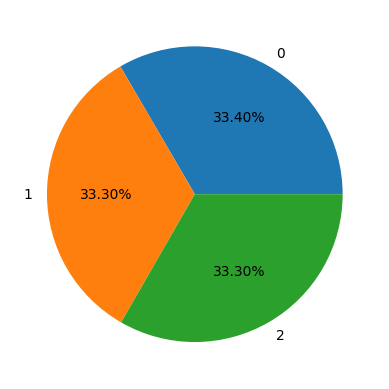

In [72]:
# questa è la distribuzione del gold standard

y_counts = np.unique(y, return_counts=True)
display(y_counts)

plt.pie(y_counts[1], labels=y_counts[0], autopct="%.02f%%")

# Task 4 

controlla il match con il gold standard

In [78]:
from sklearn.metrics.cluster import pair_confusion_matrix

cm = pair_confusion_matrix(y, best_labels)
display(cm)

tot = np.sum(cm)
display(tot)

cm_normalized = cm / tot
display(cm_normalized)
match = cm_normalized[0,0] + cm_normalized[1,1]

print(f"abbiamo un percentuale di match del {match*100:.2f}%")

array([[521350, 145316],
       [208308, 124026]])

np.int64(999000)

array([[0.52187187, 0.14546146],
       [0.20851652, 0.12415015]])

abbiamo un percentuale di match del 64.60%


# Task 5
rifai tutto con preprocessing

In [82]:
from sklearn.preprocessing import MinMaxScaler

X2 = X.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
X2

,A0,A1,A2
0,0.920959,0.187350,0.020071
1,0.420655,0.109367,0.521198
2,0.320742,0.083191,0.815046
3,0.490599,0.808861,0.848830
4,0.575483,0.856884,0.885065
...,...,...,...
995,0.509080,0.818427,0.122957
996,0.392723,0.168471,0.074819
997,0.598165,0.149380,0.518542
998,0.599659,0.887061,0.609348


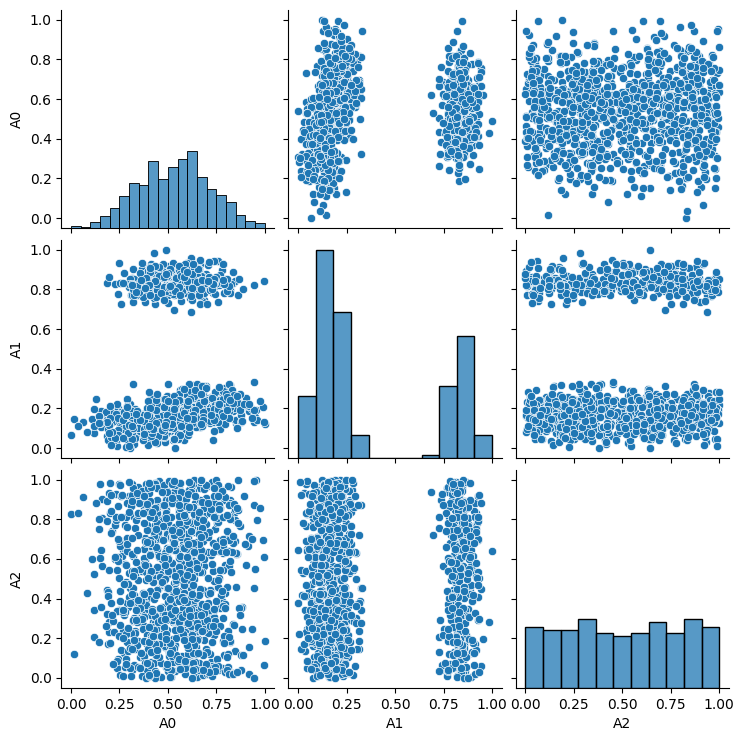

In [83]:
sns.pairplot(X2)

In [87]:
results2 = pd.DataFrame(columns=["labels", "n_clusters", "silhouette", "inertia"])

params_list2 = list(range(2,11))
params_list2

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [88]:
for p in params_list:
    km = KMeans(n_clusters=p)
    labels = km.fit_predict(X2)

    sil = silhouette_score(X2, labels)
    results2.loc[len(results2)] = [labels, p, sil, km.inertia_]

results2.sort_values(by=["silhouette", "inertia"], ascending=[False, True])

,labels,n_clusters,silhouette,inertia
1,"[2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, ...",3,0.427939,80.424823
3,"[4, 3, 3, 1, 1, 4, 4, 1, 3, 3, 3, 3, 0, 0, 4, ...",5,0.420118,46.565113
4,"[3, 0, 2, 1, 1, 3, 3, 1, 0, 5, 2, 2, 5, 5, 3, ...",6,0.398955,38.148064
2,"[1, 3, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 0, 0, 1, ...",4,0.392789,69.610120
5,"[3, 5, 6, 2, 2, 3, 3, 2, 6, 6, 6, 6, 1, 1, 5, ...",7,0.391435,34.166520
6,"[4, 5, 6, 1, 1, 4, 4, 1, 6, 5, 6, 6, 2, 2, 5, ...",8,0.356412,30.032221
7,"[4, 2, 1, 6, 6, 4, 4, 6, 2, 2, 1, 1, 7, 7, 4, ...",9,0.347683,28.102668
8,"[4, 0, 7, 3, 3, 4, 4, 3, 0, 0, 7, 7, 8, 8, 4, ...",10,0.322735,26.533744
0,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, ...",2,0.299986,156.768025


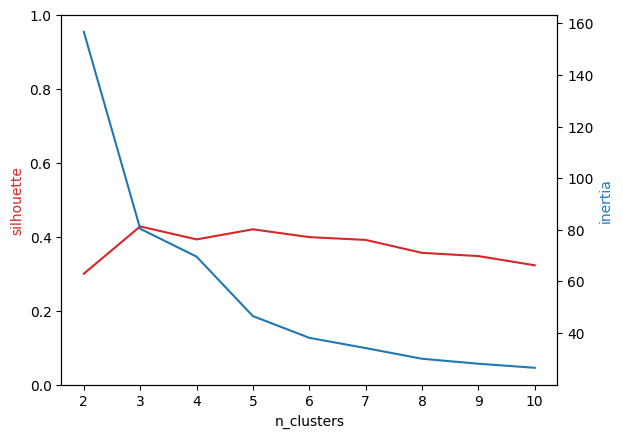

In [89]:
fig, ax1 = plt.subplots()
plt.xlabel("n_clusters")

color="tab:red"
ax1.set_ylim(0, 1)
ax1.set_ylabel("silhouette", color=color)
ax1.plot(results["n_clusters"], results2["silhouette"], color=color)

ax2 = ax1.twinx()

color="tab:blue"
ax2.set_ylabel("inertia", color=color)
ax2.plot(results["n_clusters"], results2["inertia"], color=color)

In [96]:
# Stavolta 5 sembra essere il numero di cluster giusto
best_labels = results.loc[results["n_clusters"] == 5, "labels"].values[0]
best_labels

array([4, 3, 1, 3, 0, 0, 4, 3, 1, 3, 1, 1, 4, 2, 0, 3, 3, 3, 1, 3, 0, 3,
       0, 0, 4, 2, 2, 2, 1, 1, 1, 1, 0, 4, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0,
       4, 1, 0, 0, 3, 0, 3, 3, 4, 0, 1, 2, 1, 4, 3, 0, 0, 1, 2, 3, 3, 3,
       0, 1, 1, 4, 0, 3, 3, 4, 3, 0, 0, 0, 3, 0, 3, 2, 2, 0, 1, 3, 4, 0,
       3, 2, 4, 4, 3, 2, 0, 4, 2, 4, 3, 4, 3, 0, 0, 0, 0, 4, 3, 2, 0, 1,
       4, 1, 1, 1, 1, 0, 0, 4, 2, 2, 1, 1, 2, 2, 3, 1, 3, 3, 0, 0, 1, 4,
       0, 0, 2, 1, 4, 0, 1, 2, 0, 2, 3, 2, 1, 2, 3, 0, 4, 1, 1, 0, 3, 3,
       3, 0, 3, 0, 2, 3, 0, 0, 1, 0, 1, 3, 3, 1, 1, 3, 0, 0, 3, 3, 4, 1,
       2, 2, 3, 1, 0, 0, 4, 2, 2, 3, 1, 4, 3, 3, 2, 3, 3, 3, 2, 3, 0, 2,
       3, 1, 3, 1, 1, 2, 0, 0, 3, 2, 1, 3, 1, 0, 3, 0, 1, 0, 0, 0, 0, 3,
       2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 3, 0, 0, 2, 3, 3, 2, 3, 2, 0, 1, 1,
       4, 3, 4, 2, 3, 1, 0, 1, 3, 0, 3, 4, 0, 2, 1, 1, 3, 0, 2, 0, 2, 0,
       1, 2, 1, 3, 0, 1, 4, 1, 0, 0, 2, 1, 1, 0, 3, 3, 3, 2, 4, 0, 3, 3,
       2, 3, 3, 0, 3, 2, 4, 3, 2, 3, 4, 3, 0, 3, 1,

In [97]:
cm = pair_confusion_matrix(y, best_labels)
display(cm)

tot = np.sum(cm)
display(tot)

cm_normalized = cm / tot
display(cm_normalized)
match = cm_normalized[0,0] + cm_normalized[1,1]

print(f"abbiamo un percentuale di match del {match*100:.2f}%")

array([[549470, 117196],
       [231116, 101218]])

np.int64(999000)

array([[0.55002002, 0.11731331],
       [0.23134735, 0.10131932]])

abbiamo un percentuale di match del 65.13%


(array([0, 1, 2, 3, 4], dtype=int32), array([280, 177, 180, 257, 106]))

([<matplotlib.patches.Wedge at 0x7360a8cc5bd0>,
 [Text(0.7011663881840666, 0.847564567499675, '0'),
  Text(-0.7454111497300971, 0.8089265837256524, '1'),
  Text(-1.0523831291606585, -0.3201402028143623, '2'),
  Text(0.10695941301580457, -1.0947875063076464, '3'),
  Text(1.039569465383084, -0.3595765935696163, '4')],
 [Text(0.38245439355494537, 0.4623079459089136, '28.00%'),
  Text(-0.40658789985278027, 0.441232682032174, '17.70%'),
  Text(-0.5740271613603591, -0.17462192880783398, '18.00%'),
  Text(0.058341498008620665, -0.5971568216223525, '25.70%'),
  Text(0.5670378902089549, -0.19613268740160886, '10.60%')])

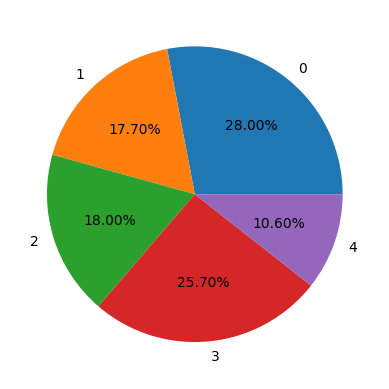

In [98]:
km_label_counts = np.unique(best_labels, return_counts=True)
display(km_label_counts)

plt.pie(km_label_counts[1], labels=km_label_counts[0], autopct="%.02f%%")